In [36]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

df = pd.read_csv("medical_examination (1).csv")

In [59]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [60]:
df["overweight"] = df.weight / ((df.height/100) ** 2) >25

In [61]:
df.overweight = df.overweight.astype(int)

In [62]:
df["overweight"]

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [63]:
df.cholesterol[df.cholesterol == 1] = 0
df.cholesterol[df.cholesterol >1] = 1

<ipython-input-63-ac6ee4b518d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cholesterol[df.cholesterol == 1] = 0
<ipython-input-63-ac6ee4b518d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cholesterol[df.cholesterol >1] = 1


In [64]:
df.gluc[df.gluc == 1] = 0
df.gluc[df.gluc > 1 ] = 1

<ipython-input-64-23cb9b7f7881>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gluc[df.gluc == 1] = 0
<ipython-input-64-23cb9b7f7881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gluc[df.gluc > 1 ] = 1


In [65]:
#just a cleaner way to do the above conditional changes
#df.loc[df.my_channel > 20000, 'my_channel'] = 0
#df.loc[df.cholesterol == 0, "cholesterol"] = 0


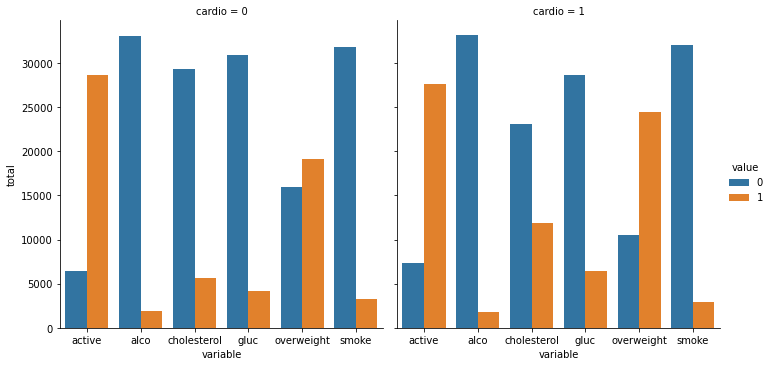

In [68]:
#Having to copy this again, let me try to break it down to understand
'''
First I'm creating another dataset with the necessary variables avtive, alco, cholesterol, gluc, overweight and smoke, 
then I need to split it based on the boolean cardio. No idea what the use of var_name is. Seems like it is defunct 
because variable is the variable is the name set automatically. Next I am making a sns catplot with dfcat.
so data is the data that I'm going to use, x is the x axis and I'm using variable as my x axis and that means that it'll
have all the different elements like active, gluc and so on. I'm using col as cardio, and that splits it into 2 plots based
on cardio = 1 and cardio = 2.
'''

dfcat = pd.melt(df, id_vars = "cardio", var_name = 'variable', value_vars = ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])


sns.catplot(data = dfcat, kind = "count", x = "variable", hue = "value", col = "cardio").set_axis_labels("variable", "total")

In [67]:
df.overweight

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [69]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [83]:
'''Cleaning the data, unsure if it means that I set it to zero or
remove the unwanted data 
First mistake I made was to group the dataframes together and not the logic. 
Looking at the way it's written it seems like we are only grabbing the 
data that mets the condition and ignoring the rest'''
#df_heat = df[(df['ap_lo'] <= df['ap_hi'])] & df[(df['height'] >= df['height'].quantile(0.025))] & df[(df['height'] >= df['height'].quantile(0.975))] & df[(df['weight'] >= df['weight'].quantile(0.975))] & df[(df['weight'] >= df['weight'].quantile(0.025))]

df_heat = df[(df['ap_lo']<=df['ap_hi']) &
            (df['height'] >= df['height'].quantile(0.025))&
            (df['height'] <= df['height'].quantile(0.975))&
            (df['weight'] >= df['weight'].quantile(0.025))&
            (df['weight'] <= df['weight'].quantile(0.975))]

<AxesSubplot:>

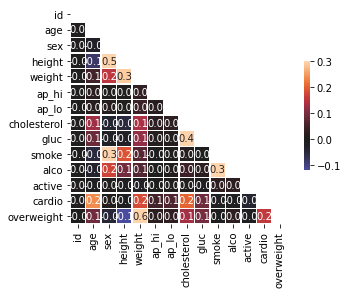

In [90]:
'''What the fuck is a correlation matrix
Why is it df.corr and not df_heat.corr()'''
import numpy as np

corr = df.corr()
mask = np.triu(corr)

plt.figsize = (16,5)
sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)

In [ ]:
'''import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column
'''df['overweight']= df["weight"] / np.square(df["height"]/100)>25
df.overweight = df.overweight.astype(int)'''

df['overweight'] = np.where(df['weight']/(np.square((df['height']/100)))>25, 1, 0)


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

'''df["gluc"][df["gluc"] == 1] = 0
df["gluc"][df["gluc"] > 1] = 1

df["cholesterol"][df["cholesterol"] == 1] = 0
df["cholesterol"][df["cholesterol"] > 1] = 1
'''
df.loc[df.cholesterol == 1, "cholesterol"] = 0
df.loc[df.cholesterol > 1, "cholesterol"] = 1
df.loc[df.gluc == 1, "gluc"] = 0
df.loc[df.gluc >1, "gluc"] = 1

# Draw Categorical Plot
def draw_cat_plot():
        # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = pd.melt(df, var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars = 'cardio')

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")
    fig = fig.fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
             (df['height'] >= (df['height'].quantile(0.025))) & 
             (df['height'] <= (df['height'].quantile(0.975))) & 
             (df['weight'] >= (df['weight'].quantile(0.025))) & 
             (df['weight'] <= (df['weight'].quantile(0.975)))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with 'sns.heatmap()'

    sns.heatmap(corr, 
                mask=mask, 
                vmax=.3, 
                square=True,
                linewidths=.5,
                annot = True,
                fmt='.1f')    
  #sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)
    #fig = f.get_figure()


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
'''

Let me try shamelessly copying other code to see if it works..